In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from v1_Basics.PradaQ import PradaQ
from v1_Basics.LVQ import LVQ
from v1_Basics.QVisuals import QVisuals

In [21]:
tickers = ["ADANIPOWER.NS", "HDFCBANK.NS", "BEL.BO", "CIPLA.NS", "TATASTEEL.NS", "ICICIBANK.NS"]
test2 = LVQ(tickers)
test2.ingest_and_clean("2020-01-01", "2026-01-01")
pairs = test2.find_cointegrated_pairs()
print(f"Discovered Arbitrage Pairs: {pairs}")

[*********************100%***********************]  6 of 6 completed


Discovered Arbitrage Pairs: [{'pair': ('CIPLA.NS', 'ICICIBANK.NS'), 'p_value': np.float64(0.01624618613759598), 'confidence': '95%'}]


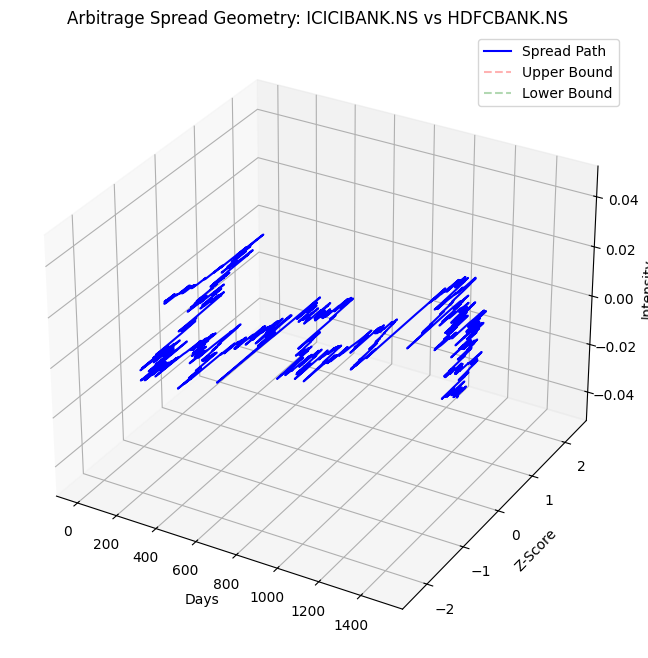

In [24]:
from v1_Basics.QVisuals import QVisuals

QVisuals.plot_3D(test2, 'ICICIBANK.NS', 'HDFCBANK.NS')

In [25]:
from v1_Basics.Simulator import ExecutionSimulator
ExecutionSimulator.run_backtest(test2, "ICICIBANK.NS", "HDFCBANK.NS")


(Date
 2020-01-01    1.000000
 2020-01-02    1.000000
 2020-01-03    1.000000
 2020-01-06    1.000000
 2020-01-07    1.000000
                 ...   
 2025-12-25    2.120407
 2025-12-26    2.120407
 2025-12-29    2.120407
 2025-12-30    2.120407
 2025-12-31    2.120407
 Length: 1489, dtype: float64,
 np.float64(0.6127706722751095),
 np.float64(-0.2884186464098139))

[*********************100%***********************]  1 of 1 completed

Final Profit: 112.04%
Sharpe Ratio: 0.61
Max Drawdown: -28.84%


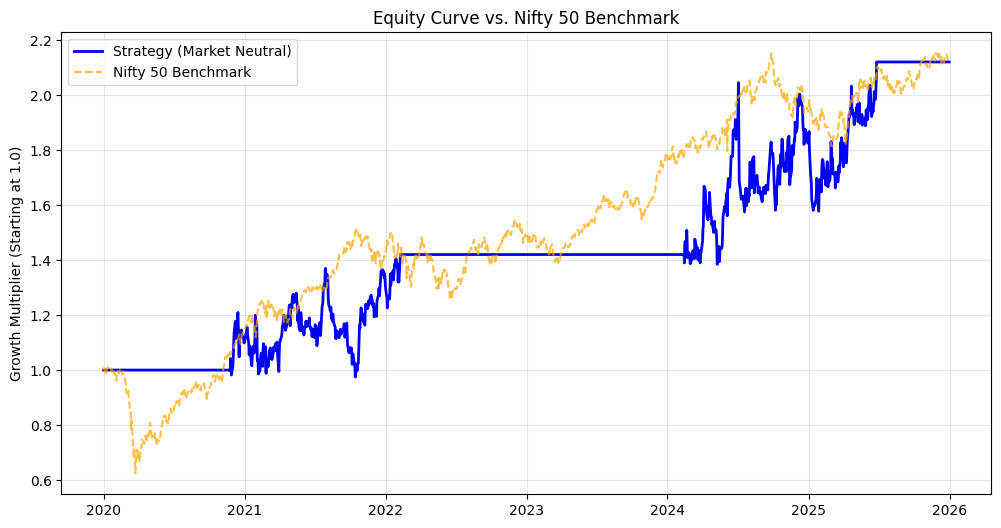

In [26]:
from v1_Basics.Simulator import ExecutionSimulator

# 1. Run backtest (Now returns 3 values!)
equity_curve, sharpe, max_dd = ExecutionSimulator.run_backtest(test2, 'ICICIBANK.NS', 'HDFCBANK.NS')

print(f"Final Profit: {(equity_curve.iloc[-1] - 1):.2%}")
print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: {max_dd:.2%}")

# 2. Plot the comparison
ExecutionSimulator.plot_performance(equity_curve, test2.data)

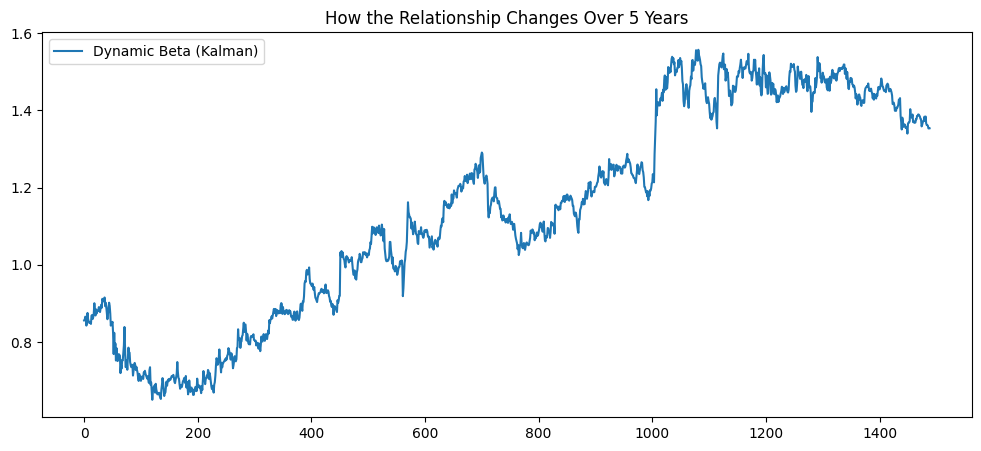

In [16]:
from v2_Adaptive.AdaptiveAlpha import AdaptiveAlpha

# Get the Dynamic Z-Score
dyn_z, dyn_beta = AdaptiveAlpha.get_dynamic_spread(test2, 'ICICIBANK.BO', 'HDFCBANK.NS')

# Visualize the difference
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(dyn_beta, label='Dynamic Beta (Kalman)')
plt.title("How the Relationship Changes Over 5 Years")
plt.legend()
plt.show()

In [17]:
from v1_Basics.Simulator import ExecutionSimulator

equity_curve, sharpe = ExecutionSimulator.run_adaptive_backtest(test2, 'ICICIBANK.BO', 'HDFCBANK.NS', dyn_z, dyn_beta)

print(f"Final Profit: {(equity_curve.iloc[-1] - 1):.2%}")
print(f"Sharpe Ratio: {sharpe:.2f}")

# 2. Plot the comparison
ExecutionSimulator.plot_performance(equity_curve, test2.data)

ValueError: too many values to unpack (expected 2)

--- DIAGNOSIS REPORT ---
Total Trades:      48.0
Gross Profit:      51.86%
Friction (Costs):  9.60%
Net Result:        42.26%
------------------------


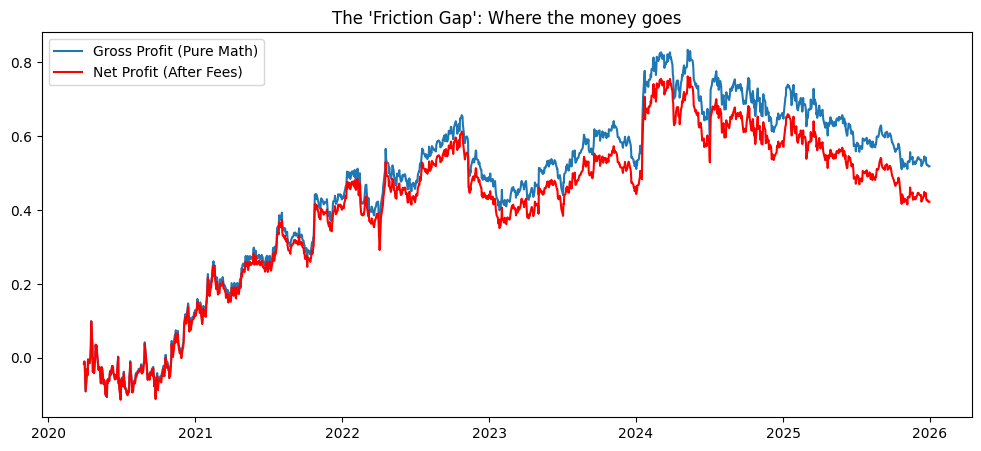

In [18]:
# 1. Run the backtest and catch the new debug variables
equity_curve, sharpe, signals, gross_rets, friction = ExecutionSimulator.run_adaptive_backtest(
    test2, 'ICICIBANK.BO', 'HDFCBANK.NS', dyn_z, dyn_beta
)

# 2. The Diagnosis Snippet
trade_count = signals.diff().abs().sum()
total_gross = gross_rets.sum()
total_cost = friction.sum()

print(f"--- DIAGNOSIS REPORT ---")
print(f"Total Trades:      {trade_count}")
print(f"Gross Profit:      {total_gross:.2%}")
print(f"Friction (Costs):  {total_cost:.2%}")
print(f"Net Result:        {(total_gross - total_cost):.2%}")
print(f"------------------------")

# 3. Visualizing the "Bleed"
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(gross_rets.cumsum(), label='Gross Profit (Pure Math)')
plt.plot((gross_rets - friction).cumsum(), label='Net Profit (After Fees)', color='red')
plt.title("The 'Friction Gap': Where the money goes")
plt.legend()
plt.show()

In [19]:
from v1_Basics.PradaQ import PradaQ
from v2_Adaptive.AdaptiveAlpha import AdaptiveAlpha
from v1_Basics.Simulator import ExecutionSimulator

# 1. Initialize with tickers (Required by your __init__)
banking_tickers = ['HDFCBANK.NS', 'ICICIBANK.NS']
test_banks = PradaQ(banking_tickers) 

# 2. Fetch and Clean the data (This creates self.data and self.returns)
# Note: Your class uses ingest_and_clean, not fetch_data!
test_banks.ingest_and_clean(start="2021-01-01", end="2026-01-01")

# 3. Generate the Adaptive Alpha
dyn_z, dyn_beta = AdaptiveAlpha.get_dynamic_spread(test_banks, 'HDFCBANK.NS', 'ICICIBANK.NS')

# 4. Run the Backtest with Debug Exports
equity, sharpe, signals, gross_rets, friction = ExecutionSimulator.run_adaptive_backtest(
    test_banks, 'HDFCBANK.NS', 'ICICIBANK.NS', dyn_z, dyn_beta
)

[*********************100%***********************]  2 of 2 completed


In [20]:
# 1. Generate Adaptive Alpha for the Banks
dyn_z, dyn_beta = AdaptiveAlpha.get_dynamic_spread(test_banks, 'HDFCBANK.NS', 'ICICIBANK.NS')

# 2. Run the Backtest
equity, sharpe, signals, gross_rets, friction = ExecutionSimulator.run_adaptive_backtest(
    test_banks, 'HDFCBANK.NS', 'ICICIBANK.NS', dyn_z, dyn_beta
)

# 3. Comprehensive Diagnosis
trade_count = signals.diff().abs().sum()
total_gross = gross_rets.sum()
total_friction = friction.sum()

print(f"--- BANKING PAIR ANALYSIS ---")
print(f"Total Trades:      {trade_count}")
print(f"Gross Profit:      {total_gross:.2%}")
print(f"Friction (Costs):  {total_friction:.2%}")
print(f"Net Result:        {(total_gross - total_friction):.2%}")
print(f"Sharpe Ratio:      {sharpe:.2f}")

--- BANKING PAIR ANALYSIS ---
Total Trades:      40.0
Gross Profit:      -47.20%
Friction (Costs):  8.00%
Net Result:        -55.20%
Sharpe Ratio:      -0.34


In [ ]:
from v2_Adaptive.HybridAlpha import HybridAlpha

# 1. Generate Hybrid Alpha (6-month memory)
hyb_z, hyb_beta = HybridAlpha.get_rolling_method(test_banks, 'HDFCBANK.NS', 'ICICIBANK.NS', window=126)

# 2. Run the Backtest (Using your fixed Universal Aligner)
equity_hyb, sharpe_hyb, signals, gross_rets, friction = ExecutionSimulator.run_adaptive_backtest(
    test_banks, 'HDFCBANK.NS', 'ICICIBANK.NS', hyb_z, hyb_beta.values, burn_in=0 
)

print(f"Hybrid Strategy Sharpe: {sharpe_hyb:.2f}")
print(f"Hybrid Net Profit: {(equity_hyb.iloc[-1] - 1):.2%}")

AttributeError: type object 'HybridAlpha' has no attribute 'get_rolling_spread'